# Tidy data in Pandas

### Handy hints 

Some Jupyter shortcut keys:

- Esc : get into Command mode (leaves Edit mode)
- Enter : edit a cell (puts you in Edit mode)
- h : see help (see all commands)
- Shift+Enter or Ctrl+Enter : run the code in the cell
- a / b : add new cell above/below
- m : turn current cell into a Markdown cell
- y : turn current cell into a Code cell
- 1-6 : turn current cell into a heading (a type of Markdown cell)

You can get help on Python objects and functions with `help()` or the `?` operator.

## Setup 

In [4]:
import pandas as pd
import numpy as np

In [5]:
# This causes Jupyter to display any matplotlib plots directly in the notebook
# It also works for pandas and seaborn, since they use matplotlib to render plots
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
# pyplot (as plt) is the module we'll primarily use to instantiate matplotlib plot objects
from matplotlib import pyplot as plt
import seaborn as sns

## Pandas 

You can find the Pandas website and documentation at https://pandas.pydata.org/

Pandas is a popular Python library for handling tabular data. It provides much of the same functionality for Python as do data frames in the R language. 

The fundamental data types in Pandas are a Series, representing a 1D array of data:

In [143]:
s = pd.Series(["Diego","Jessica","Farah"])
s

0      Diego
1    Jessica
2      Farah
dtype: object

and a DataFrame, representing a 2D table of data: 

In [144]:
df = pd.DataFrame({'Name': ["Diego","Jessica","Farah"],
                   'Age': [34, 27, 50]})
df

,Name,Age
0,Diego,34
1,Jessica,27
2,Farah,50


We can think of a DataFrame like a spreadsheet or a table in a database; every column represents a variable in the dataset. Each column of a DataFrame has a particular type (ints, floats, datetimes, strings etc) and each column can be treated as a Pandas Series.

Above, we constructed data manually using lists and dicts. For the rest of this workshop, we will work with real data. DataFrames are the natural type to use when reading in tabular data from, for instance, CSV files or Excel files.

Here's example to read in some small datasets which we can use for demo purposes:

In [12]:
iris = pd.read_csv('iris.csv')
cars = pd.read_csv('mtcars.csv')

## Data 

The data we'll use for this workshop is from the [Long Term Evolution Experiment (LTEE)](http://myxo.css.msu.edu/ecoli/). This experiment has been running for over 30 years and over 50,000 E. coli generations, and is still ongoing. Twelve separate populations of E. coli have been propagated for the life of the experiment. Every 500 generations, each population is cloned and stored, allowing researchers to study evolutionary behaviour over the long term, and to "rewind and replay" alternate evolutionary trajectories by propagating from an earlier clone. 

Several interesting events have occurred during the experiment. Some populations have spontaneously developed hypermutator phenotypes. In addition, around generation 31,000 one population, Ara-3, spontaneously developed a rare and novel Cit+ mutation, giving it the ability to metabolise citrate in the substrate.

There have been many publications from this experiment. A handful:

- [Blount et al 2008: Historical contingency and the evolution of a key innovation in an experimental population of Escherichia coli](https://www.pnas.org/content/105/23/7899) - on the spontaneous development of citrate metabolisation and on potentiating mutations
- [Tenaillon et al 2016: Tempo and mode of genome evolution in a 50,000-generation experiment](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4988878) - various investigations by sequencing and variant-calling over 50,000 generations of clones, including discussion of hypermutator phenotypes and genetic drift vs natural selection.

Sequence data from clones is available, but for this workshop we'll just be using some published tabular data.

A version of this dataset is also used by the [Data Carpentry lessons on Genomics](https://datacarpentry.org/genomics-workshop/).

In the repository you'll find the files:

- ltee_sampleruns.csv : sample and sequencing run metadata for the E. coli clones
- ltee_mutations.csv : analysis output from variant calling on the E. coli clones
- ltee_relative_fitness.tsv : relative fitness values for each population and generation up to generation 10,000
- ltee_cell_size.tsv : cell sizes for each population and generation up to 10,000

Let's read in the sample and run metadata. Pandas has functions for reading in many data types. Try looking at the documentation for `read_csv()` by running `help(pd.read_csv)` or `pd.read_csv?`.

In [7]:
sampleruns = pd.read_csv('ltee_sampleruns.csv')

In [49]:
# The number of rows and columns
sampleruns.shape

(264, 11)

In [50]:
# The first few rows
sampleruns.head()

,Population,Generation,Strain ID,Mutator,Reference,Facility,Accession,Read Type,Read Length,Sequencing Depth,Analysis Notes
0,Ara+1,500,REL768A,None,This study,Genoscope,SRR2584408,single,36,70.241277,NaN
1,Ara+1,500,REL768B,None,This study,Genoscope,SRR2584409,single,36,41.136778,NaN
2,Ara+1,1000,REL958A,None,This study,Genoscope,SRR2584410,single,36,33.226052,NaN
3,Ara+1,1000,REL958B,None,This study,Genoscope,SRR2584411,single,36,34.589932,NaN
4,Ara+1,1500,REL1062A,None,This study,Genoscope,SRR2584438,single,36,40.342099,NaN


In [71]:
# Column data types
sampleruns.dtypes

Population           object
Generation            int64
Strain ID            object
Mutator              object
Reference            object
Facility             object
Accession            object
Read Type            object
Read Length           int64
Sequencing Depth    float64
Analysis Notes       object
dtype: object

In [53]:
# Column names
sampleruns.columns

Index(['Population', 'Generation', 'Strain ID', 'Mutator', 'Reference',
       'Facility', 'Accession', 'Read Type', 'Read Length', 'Sequencing Depth',
       'Analysis Notes'],
      dtype='object')

In [54]:
# Index (i.e. row names)
# In this case we didn't provide an index and rows have simply been numbered for us by Pandas
sampleruns.index

RangeIndex(start=0, stop=264, step=1)

#### Exercise

1. Use `pd.read_csv()` to read the file `ltee_mutations.csv` into a variable called `mutations`.
2. Check the column headings and the number of rows in this dataset, and have a look at the first few rows. Compare the size of the dataset and the variables to `sampleruns`.

In [59]:
mutations = pd.read_csv('ltee_mutations.csv')

In [60]:
mutations.head()

,Population,Strain ID,Generation,Total Mutations,Base Substitutions,IS Element Insertions,Small Indels,Large Deletions,Large Duplications,Total Deleted Base Pairs,Total Inserted Base Pairs,Estimated Final Genome Size,Synonymous Base Substitutions,Nonsynonymous Base Substitutions,Nonsense Base Substitutions,Pseudogene Base Substitutions,Noncoding RNA Base Substitutions,Intergenic Base Substitutions
0,Ara+1,REL768A,500,4,3,0,0,1,0,6244,0,4623568,0,2,0,0,0,1
1,Ara+1,REL768B,500,3,1,1,0,1,0,4772,1349,4626389,0,1,0,0,0,0
2,Ara+1,REL958A,1000,4,2,0,1,1,0,2544,0,4627268,0,2,0,0,0,0
3,Ara+1,REL958B,1000,2,1,1,0,0,0,0,1446,4631258,0,1,0,0,0,0
4,Ara+1,REL1062A,1500,7,5,0,0,2,0,6305,0,4623507,0,4,0,0,0,1


## Indexing and slicing 

We can extract a column from the DataFrame by indexing with square brackets, e.g. 

In [ ]:
# Extracting a column
sampleruns['Strain ID']

Firstly, let's set our index (row names) to something more meaningful to make it easier to see what's going on. The Strain ID uniquely identifies each sample, so it is probably a sensible index. We can use `sampleruns.set_index()`, or we can assign to the index directly:

In [56]:
sampleruns.index = sampleruns['Strain ID']
sampleruns.head()

,Population,Generation,Strain ID,Mutator,Reference,Facility,Accession,Read Type,Read Length,Sequencing Depth,Analysis Notes
Strain ID,,,,,,,,,,,
REL768A,Ara+1,500,REL768A,None,This study,Genoscope,SRR2584408,single,36,70.241277,NaN
REL768B,Ara+1,500,REL768B,None,This study,Genoscope,SRR2584409,single,36,41.136778,NaN
REL958A,Ara+1,1000,REL958A,None,This study,Genoscope,SRR2584410,single,36,33.226052,NaN
REL958B,Ara+1,1000,REL958B,None,This study,Genoscope,SRR2584411,single,36,34.589932,NaN
REL1062A,Ara+1,1500,REL1062A,None,This study,Genoscope,SRR2584438,single,36,40.342099,NaN


The two most important ways to extract data from a DataFrame are `loc` and `iloc`. `loc` uses the index and the column names; `iloc` uses the row and column numbers, counting from zero. 

In [58]:
sampleruns.loc['REL768B', 'Accession']

'SRR2584409'

In [61]:
# Row 0, column 9
sampleruns.iloc[0,9]

70.24127718360918

In [62]:
# Rows 1-3, column 9
sampleruns.iloc[1:4, 9]

Strain ID
REL768B    41.136778
REL958A    33.226052
REL958B    34.589932
Name: Sequencing Depth, dtype: float64

In [63]:
# All columns
sampleruns.loc['REL768B', :]

Population               Ara+1
Generation                 500
Strain ID              REL768B
Mutator                   None
Reference           This study
Facility             Genoscope
Accession           SRR2584409
Read Type               single
Read Length                 36
Sequencing Depth       41.1368
Analysis Notes             NaN
Name: REL768B, dtype: object

In [66]:
# Lists let us specify any set of rows and columns, in any order
sampleruns.loc[['REL768A','REL958A'], ['Read Type', 'Read Length']]

,Read Type,Read Length
Strain ID,,
REL768A,single,36
REL958A,single,36


In [14]:
# We can also use True/False values to perform boolean indexing. 
# Pandas will return the rows/columns matching the True values we pass in.
# This will be useful later for filtering data
iris.loc[0:5, [True, False, True, True, False]]

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
5,5.4,1.7,0.4


#### Exercise

1. Set the index of `mutations` to be the same as the "Strain ID" column.
2. Extract the population, generation, and number of total mutations for strain REL11345

In [69]:
mutations.index = mutations['Strain ID']

In [70]:
mutations.loc['REL11345', ['Population','Generation', 'Total Mutations']]

Population         Ara+3
Generation         50000
Total Mutations     1729
Name: REL11345, dtype: object

## Manipulating Series

A single column of a DataFrame is a Series object. Series have a data type:

In [77]:
sampleruns['Sequencing Depth'].dtype

dtype('float64')

Like a DataFrame, a Series has an index. In this case we got our Series from a column of a DataFrame, so it will have the same index:

In [87]:
sampleruns['Sequencing Depth'].index

Index(['REL768A', 'REL768B', 'REL958A', 'REL958B', 'REL1062A', 'REL1062B',
       'REL1158A', 'REL1158C', 'REL2173A', 'REL2173B',
       ...
       'REL7182A', 'REL7182B', 'REL8598A', 'REL8598B', 'REL10447', 'REL10448',
       'REL11005', 'REL11006', 'REL11389', 'REL11390'],
      dtype='object', name='Strain ID', length=264)

There are several convenience functions defined on Series. For instance, we can find the average sequencing depth:

In [82]:
sampleruns['Sequencing Depth'].mean()

115.77451401512721

Similarly for numeric variables we have, for instance, `.min()` and `.max()`, `.median()`, `std()`, and `sum()`.

`.describe()` is a convenience function for getting several summary statistics at once:

In [83]:
sampleruns['Sequencing Depth'].describe()

count     264.000000
mean      115.774514
std       149.345576
min        27.803535
25%        60.845261
50%        79.629418
75%       106.138199
max      1026.249751
Name: Sequencing Depth, dtype: float64

For non-numeric variable types such as strings and categoricals, we may want to look at the unique values.

In [84]:
sampleruns['Read Type'].unique()

array(['single', 'paired'], dtype=object)

In [85]:
sampleruns['Read Type'].value_counts()

paired    134
single    130
Name: Read Type, dtype: int64

Pandas makes use of numpy vectorisation, meaning we can do operations on Series with simple syntax, and it will be efficient to run.

In [88]:
# TODO: use mutations unless exercise
sampleruns['Sequencing Depth'].head()

Strain ID
REL768A     70.241277
REL768B     41.136778
REL958A     33.226052
REL958B     34.589932
REL1062A    40.342099
Name: Sequencing Depth, dtype: float64

In [90]:
sampleruns['Sequencing Depth'].head() + 5

Strain ID
REL768A     75.241277
REL768B     46.136778
REL958A     38.226052
REL958B     39.589932
REL1062A    45.342099
Name: Sequencing Depth, dtype: float64

You might have noticed that the `Analysis Notes` column contains a lot of NaN's. This means "not a number" and represents a missing value - i.e. these cells are empty. 

In [116]:
sampleruns.head()

,Population,Generation,Strain ID,Mutator,Reference,Facility,Accession,Read Type,Read Length,Sequencing Depth,Analysis Notes
Strain ID,,,,,,,,,,,
REL768A,Ara+1,500,REL768A,None,This study,Genoscope,SRR2584408,single,36,70.241277,NaN
REL768B,Ara+1,500,REL768B,None,This study,Genoscope,SRR2584409,single,36,41.136778,NaN
REL958A,Ara+1,1000,REL958A,None,This study,Genoscope,SRR2584410,single,36,33.226052,NaN
REL958B,Ara+1,1000,REL958B,None,This study,Genoscope,SRR2584411,single,36,34.589932,NaN
REL1062A,Ara+1,1500,REL1062A,None,This study,Genoscope,SRR2584438,single,36,40.342099,NaN


We can check which values are missing with `.isnull()`. This converts every value in the DataFrame (or Series) into a boolean True/False value.

In [117]:
sampleruns.isnull().head()

,Population,Generation,Strain ID,Mutator,Reference,Facility,Accession,Read Type,Read Length,Sequencing Depth,Analysis Notes
Strain ID,,,,,,,,,,,
REL768A,False,False,False,False,False,False,False,False,False,False,True
REL768B,False,False,False,False,False,False,False,False,False,False,True
REL958A,False,False,False,False,False,False,False,False,False,False,True
REL958B,False,False,False,False,False,False,False,False,False,False,True
REL1062A,False,False,False,False,False,False,False,False,False,False,True


Adding up booleans will treat `True` as `1` and `False` as `0`. A common approach is to use `sum()` to count how many `True` values there are. So we can count missing values like this:

In [119]:
sampleruns.isnull().sum()

Population            0
Generation            0
Strain ID             0
Mutator               0
Reference             0
Facility              0
Accession             0
Read Type             0
Read Length           0
Sequencing Depth      0
Analysis Notes      251
dtype: int64

`sampleruns` had 264 rows, so it looks like there are a few non-empty note cells. We could count this explicitly by taking the logical `not` of our True/False values, i.e. adding up cells where `isnull()` is `False`. For manipulating array-like data, we can't use the `not`, `and` and `or` boolean operators. Instead we need to use the bitwise operators `~`, `&`, and `|`.

In [121]:
(~sampleruns.isnull()).sum()

Population          264
Generation          264
Strain ID           264
Mutator             264
Reference           264
Facility            264
Accession           264
Read Type           264
Read Length         264
Sequencing Depth    264
Analysis Notes       13
dtype: int64

Notice that Pandas summed each column. We can use `sum(axis=1)` to override this default and sum each row instead.

## Sorting and filtering 

We can sort on a field, or list of fields, with `.sort_values()`:

In [19]:
# Get a random example subset
subset = sampleruns.sample(15)
subset

,Population,Generation,Strain ID,Mutator,Reference,Facility,Accession,Read Type,Read Length,Sequencing Depth,Analysis Notes
109,Ara+5,50000,REL11368,None,This study,IntraGen,SRR2584822,paired,101,100.551741,NaN
165,Ara-2,10000,REL4537B,PM,This study,MSU RTSF,SRR2584783,paired,150,33.303734,NaN
24,Ara+2,1000,REL959A,None,This study,Genoscope,SRR2584583,single,36,60.081156,NaN
257,Ara-6,20000,REL8598B,None,This study,IntraGen,SRR2584978,paired,101,91.769745,NaN
219,Ara-4,50000,REL11337,PM,This study,MSU RTSF,SRR2584889,paired,150,78.717886,NaN
198,Ara-4,500,REL765A,None,This study,MSU RTSF,SRR2584867,paired,150,62.015488,NaN
259,Ara-6,30000,REL10448,None,This study,IntraGen,SRR2589077,paired,101,97.147508,NaN
105,Ara+5,30000,REL10433,None,This study,Genoscope,SRR2584820,single,36,55.810155,NaN
75,Ara+4,5000,REL2176B,None,This study,IntraGen,SRR2588991,paired,101,135.749446,NaN
67,Ara+4,500,REL771B,None,This study,IntraGen,SRR2584698,paired,101,130.838758,NaN


In [22]:
subset.sort_values('Generation')

,Population,Generation,Strain ID,Mutator,Reference,Facility,Accession,Read Type,Read Length,Sequencing Depth,Analysis Notes
198,Ara-4,500,REL765A,None,This study,MSU RTSF,SRR2584867,paired,150,62.015488,NaN
67,Ara+4,500,REL771B,None,This study,IntraGen,SRR2584698,paired,101,130.838758,NaN
24,Ara+2,1000,REL959A,None,This study,Genoscope,SRR2584583,single,36,60.081156,NaN
181,Ara-3,1500,REL1070B,None,This study,IntraGen,SRR2584858,paired,101,102.377792,NaN
75,Ara+4,5000,REL2176B,None,This study,IntraGen,SRR2588991,paired,101,135.749446,NaN
165,Ara-2,10000,REL4537B,PM,This study,MSU RTSF,SRR2584783,paired,150,33.303734,NaN
254,Ara-6,15000,REL7182A,None,This study,IntraGen,SRR2584942,paired,101,91.040975,NaN
257,Ara-6,20000,REL8598B,None,This study,IntraGen,SRR2584978,paired,101,91.769745,NaN
259,Ara-6,30000,REL10448,None,This study,IntraGen,SRR2589077,paired,101,97.147508,NaN
105,Ara+5,30000,REL10433,None,This study,Genoscope,SRR2584820,single,36,55.810155,NaN


In [20]:
subset.sort_values(['Population','Generation'])

,Population,Generation,Strain ID,Mutator,Reference,Facility,Accession,Read Type,Read Length,Sequencing Depth,Analysis Notes
24,Ara+2,1000,REL959A,None,This study,Genoscope,SRR2584583,single,36,60.081156,NaN
67,Ara+4,500,REL771B,None,This study,IntraGen,SRR2584698,paired,101,130.838758,NaN
75,Ara+4,5000,REL2176B,None,This study,IntraGen,SRR2588991,paired,101,135.749446,NaN
105,Ara+5,30000,REL10433,None,This study,Genoscope,SRR2584820,single,36,55.810155,NaN
107,Ara+5,40000,REL10983,None,W13,Genoscope,SRR2086150,single,36,64.871361,NaN
109,Ara+5,50000,REL11368,None,This study,IntraGen,SRR2584822,paired,101,100.551741,NaN
150,Ara-1,40000,REL10938,PM,B09,MSU RTSF,SRR030258,paired,36,60.706100,NaN
165,Ara-2,10000,REL4537B,PM,This study,MSU RTSF,SRR2584783,paired,150,33.303734,NaN
174,Ara-2,50000,REL11333,PM,This study,Genoscope,SRR2584849,single,51,770.898034,NaN
181,Ara-3,1500,REL1070B,None,This study,IntraGen,SRR2584858,paired,101,102.377792,NaN


We can filter datasets using boolean indexing. This means that if we use a logical expression produce a boolean Series with a logical expression:

In [21]:
subset['Population'] == 'Ara+5'

109     True
165    False
24     False
257    False
219    False
198    False
259    False
105     True
75     False
67     False
174    False
181    False
254    False
150    False
107     True
Name: Population, dtype: bool

we can then select out only the rows (or sometimes columns) where that logical expression is True:

In [23]:
subset.loc[subset['Population'] == 'Ara+5', :]

,Population,Generation,Strain ID,Mutator,Reference,Facility,Accession,Read Type,Read Length,Sequencing Depth,Analysis Notes
109,Ara+5,50000,REL11368,None,This study,IntraGen,SRR2584822,paired,101,100.551741,NaN
105,Ara+5,30000,REL10433,None,This study,Genoscope,SRR2584820,single,36,55.810155,NaN
107,Ara+5,40000,REL10983,None,W13,Genoscope,SRR2086150,single,36,64.871361,NaN


#### Exercise 

1. Filter the `mutations` dataset to extract only samples with more than 1500 total mutations. 
2. Sort the resulting data by the number of "Small Indels". Have a look at the resulting Population and Generation columns.


In [136]:
mutations[mutations['Total Mutations'] > 1500].sort_values('Small Indels')

,Population,Strain ID,Generation,Total Mutations,Base Substitutions,IS Element Insertions,Small Indels,Large Deletions,Large Duplications,Total Deleted Base Pairs,Total Inserted Base Pairs,Estimated Final Genome Size,Synonymous Base Substitutions,Nonsynonymous Base Substitutions,Nonsense Base Substitutions,Pseudogene Base Substitutions,Noncoding RNA Base Substitutions,Intergenic Base Substitutions
Strain ID,,,,,,,,,,,,,,,,,,
REL10417,Ara+6,REL10417,30000,1837,1827,4,2,4,0,43480,4352,4590684,214,1316,32,23,1,241
REL10418,Ara+6,REL10418,30000,1883,1874,2,2,5,0,67635,2798,4564975,211,1360,30,22,1,250
REL10985,Ara+6,REL10985,40000,2185,2172,3,2,8,0,76300,3576,4557088,268,1561,35,25,1,282
REL11370,Ara+6,REL11370,50000,2557,2548,2,2,5,0,73042,2799,4559569,292,1818,42,39,1,356
REL11371,Ara+6,REL11371,50000,2293,2276,6,3,8,0,62344,5902,4573370,287,1629,38,28,1,293
REL10986,Ara+6,REL10986,40000,2021,2009,4,4,4,0,43481,5693,4592024,227,1443,38,29,1,271
REL10954,Ara+3,REL10954,40000,1537,1270,4,259,4,0,70598,5758,4564972,390,709,24,19,0,128
REL10953,Ara+3,REL10953,40000,1532,1262,4,261,5,0,92750,5757,4542819,390,706,22,17,0,127
REL11346,Ara+3,REL11346,50000,1640,1361,5,269,5,0,92764,5873,4542921,408,763,26,20,0,144


## Interlude: tidy data

[Link to "untidy data" discussion spreadsheet](https://docs.google.com/spreadsheets/d/1P94oEzgxNzlpvYiento53tZxJwaHYi8gpcdpDouu2jw/edit?usp=sharing)

(Don't look too far into this spreadsheet before we get up to it, as it includes solutions which are a spoiler for the exercise.)

## Reshaping data 

We can reshape data using particular columns, with `melt` and `pivot` or `pivot_table`. We'll have a look at this below.

We can also reshape data using the column names and index, with `stack` and `unstack`. This requires MultiIndexes, which we won't go into today.

Here are two tiny "wide" datasets based on our "untidy" housing data:

In [91]:
sales_wide1 = pd.read_csv('housing-data-wide1.csv')
sales_wide1

,property_id,bedrooms,price1,price2
0,5631500400,2,180000.0,NaN
1,6021501535,3,430000.0,700000.0
2,7129300520,3,221900.0,NaN


In [92]:
sales_wide2 = pd.read_csv('housing-data-wide2.csv', parse_dates=['date1','date2'])
sales_wide2

,property_id,bedrooms,date1,price1,date2,price2
0,5631500400,2,2015-02-25,180000.0,NaT,NaN
1,6021501535,3,2014-07-25,430000.0,2014-12-23,700000.0
2,7129300520,3,2014-10-13,221900.0,NaT,NaN


How can we reshape these into tidy form? 

The Pandas `melt` function will do this. For instance:

In [102]:
sales_wide1.melt()

,variable,value
0,property_id,5.631500e+09
1,property_id,6.021502e+09
2,property_id,7.129301e+09
3,bedrooms,2.000000e+00
4,bedrooms,3.000000e+00
5,bedrooms,3.000000e+00
6,price1,1.800000e+05
7,price1,4.300000e+05
8,price1,2.219000e+05
9,price2,NaN


This has put every variable (i.e. every column) into the new `variable` column. This probably isn't what we want. It's only the price columns that are "wide", the other variables were fine.

In [103]:
# Retain columns property_id and bedrooms
sales_wide1.melt(id_vars=['property_id','bedrooms'])

,property_id,bedrooms,variable,value
0,5631500400,2,price1,180000.0
1,6021501535,3,price1,430000.0
2,7129300520,3,price1,221900.0
3,5631500400,2,price2,NaN
4,6021501535,3,price2,700000.0
5,7129300520,3,price2,NaN


This is getting close to what we want. The `variable` column contains the original column names and tells us whether the price we're looking at was from the first or second sale (this may or may not be information we care about). The `value` column contains values in the melted columns, i.e. the actual price. 

Now we technically have long form and have eliminated the duplicated `price` variable; all prices are now in the `value` column. Notice that properties can now appear more than once in the table; conceptually, we have a row per sale rather than a row per property. 

We can tell `melt()` what to call the `variable` and `value` columns:

In [104]:
sales_tidy = sales_wide1.melt(id_vars=['property_id','bedrooms'], 
                 var_name='sale_number',
                 value_name='price')

,property_id,bedrooms,sale_number,price
0,5631500400,2,price1,180000.0
1,6021501535,3,price1,430000.0
2,7129300520,3,price1,221900.0
3,5631500400,2,price2,NaN
4,6021501535,3,price2,700000.0
5,7129300520,3,price2,NaN


We still have empty extra rows where there was no sale in the original table, i.e. rows 3 and 5. We could use `dropna()` to get rid of these. A more generic approach would be to use filtering:

In [106]:
sales = sales_wide1.melt(id_vars=['property_id','bedrooms'], 
                                     var_name='sale_number',
                                     value_name='price')
sales = sales[~sales['price'].isnull()]
sales

,property_id,bedrooms,sale_number,price
0,5631500400,2,price1,180000.0
1,6021501535,3,price1,430000.0
2,7129300520,3,price1,221900.0
4,6021501535,3,price2,700000.0


This is pretty good! Now we could run commands like `sales["price"].mean()` and get a sensible answer. We'll also be able to use the data easily to produce plots.

If you want a challenge, think about how you could convert `sales_wide2` to tidy form - it's a fair bit harder.

The inverse operation to `.melt()` is `.pivot()`:

In [110]:
sales.pivot(index='property_id', columns='sale_number', values='price')

sale_number,price1,price2
property_id,,
5631500400,180000.0,NaN
6021501535,430000.0,700000.0
7129300520,221900.0,NaN


TODO: perhaps demo pivot_table

Let's have a look at our two remaining LTEE datasets. 

These two files record measurements of:

- the cell size for every population for the first 10,000 generations, measured every 1000 generations
- the relative fitness for every population for the first 10,000 generations, as measured by the growth rate of the strain relative to a reference strain.

In [114]:
# These are TSV files, so specify tab as the delimiter
cellsize = pd.read_csv('ltee_cell_size.tsv', sep="\t")
fitness = pd.read_csv('ltee_relative_fitness.tsv', sep="\t")

In [96]:
cellsize

,Gen,A-1,A-2,A-3,A-4,A-5,A-6,A+1,A+2,A+3,A+4,A+5,A+6
0,0,0.3725,0.3725,0.3725,0.3725,0.3725,0.3725,0.3725,0.3725,0.3725,0.3725,0.3725,0.3725
1,500,0.4850,0.5100,0.4500,0.5150,0.5300,0.4550,0.4800,0.4700,0.4700,0.4850,0.5250,0.4600
2,1000,0.5150,0.6250,0.6250,0.5800,0.6300,0.5150,0.4950,0.5550,0.5750,0.4950,0.5850,0.5850
3,2000,0.6000,0.6600,0.6300,0.7000,0.7050,0.5450,0.5800,0.6750,0.6450,0.6750,0.6750,0.6400
4,5000,0.6650,0.9450,0.7000,0.7650,0.9150,0.6550,0.5950,0.8900,0.8500,0.6500,0.7250,0.7350
5,8000,0.6700,0.9400,0.6950,0.8150,0.8700,0.6750,0.6950,0.8950,0.9750,0.7500,0.8350,1.0800
6,9000,0.6850,0.9750,0.6850,0.8100,0.8800,0.6600,0.7350,0.9200,0.9850,0.7900,0.8900,1.0200
7,9500,0.6700,0.9350,0.6850,0.7350,0.8500,0.6850,0.7200,0.9400,0.9650,0.8350,0.8950,0.9650
8,10000,0.6700,0.8450,0.7000,0.7600,0.7750,0.6550,0.7050,1.1000,0.8950,0.8450,0.8100,1.0150


To make life easier down the track, we'll rename the columns to match the variable and population names used in the `sampleruns` and `mutations` tables.

In [99]:
cellsize.columns = (['Generation'] + ['Ara-{}'.format(n) for n  in range(1,7)] + 
                    ['Ara+{}'.format(n) for n  in range(1,7)])
cellsize.head()

,Generation,Ara-1,Ara-2,Ara-3,Ara-4,Ara-5,Ara-6,Ara+1,Ara+2,Ara+3,Ara+4,Ara+5,Ara+6
0,0,0.3725,0.3725,0.3725,0.3725,0.3725,0.3725,0.3725,0.3725,0.3725,0.3725,0.3725,0.3725
1,500,0.4850,0.5100,0.4500,0.5150,0.5300,0.4550,0.4800,0.4700,0.4700,0.4850,0.5250,0.4600
2,1000,0.5150,0.6250,0.6250,0.5800,0.6300,0.5150,0.4950,0.5550,0.5750,0.4950,0.5850,0.5850
3,2000,0.6000,0.6600,0.6300,0.7000,0.7050,0.5450,0.5800,0.6750,0.6450,0.6750,0.6750,0.6400
4,5000,0.6650,0.9450,0.7000,0.7650,0.9150,0.6550,0.5950,0.8900,0.8500,0.6500,0.7250,0.7350


In [101]:
fitness.columns = (['Generation'] + ['Ara-{}'.format(n) for n  in range(1,7)] + 
                    ['Ara+{}'.format(n) for n  in range(1,7)])

#### Exercise

The cell size and relative fitness data is in wide form. Convert each one to tidy form. When thinking about which columns are "wide", it may help to aim to match the variables in the `sampleruns` and `mutations` tables.

## Merging data 

We can merge two datasets together by matching corresponding variables.

Our main options are `DataFrame.join()` and `pandas.merge()`. `merge()` is a little more flexible, so we'll demonstrate that.

Recall the `cars` dataset:

In [141]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


The `origin` column here, which is a number 1-3, is actually intended to represent the country of origin. It's encoded as:

- USA : 1
- Europe : 2
- Japan : 3

Let's make a DataFrame to represent this mapping. We'll add a fourth code for Australia, which doesn't appear in the dataset!

In [166]:
origin_codes = pd.DataFrame(
    {
        'origin': [1,2,3],
        'origin_country': ['USA','Europe','Japan']
    }
)
origin_codes

,origin,origin_country
0,1,USA
1,2,Europe
2,3,Japan


We can use `pandas.merge()` to join our `cars` table to our `origin_codes` table using the shared `origin` field, like so:

In [151]:
cars_withorigin = pd.merge(cars, origin_codes)
cars_withorigin.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,origin_country
14,22.0,6,198.0,95,2833,15.5,70,1,plymouth duster,USA
296,46.6,4,86.0,65,2110,17.9,80,3,mazda glc,Japan
385,29.8,4,89.0,62,1845,15.3,80,2,vokswagen rabbit,Europe
299,33.8,4,97.0,67,2145,18.0,80,3,subaru dl,Japan
148,15.5,8,318.0,145,4140,13.7,77,1,dodge monaco brougham,USA
67,14.0,8,318.0,150,4237,14.5,73,1,plymouth fury gran sedan,USA
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,USA
117,23.0,4,140.0,83,2639,17.0,75,1,ford pinto,USA
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,USA
53,15.0,8,304.0,150,3892,12.5,72,1,amc matador (sw),USA


This "just worked" because Pandas correctly deduced that the identically-named field(s) were the ones to match on. Sometimes we might need to be more verbose. In this case, this accomplishes the same thing as the above:

In [165]:
# use origin from the left dataframe (cars) and from the right (origin_codes)
# use how="left" (keep all origin values that exist in the left dataframe)
cars_withorigin = pd.merge(cars, origin_codes, left_on='origin', right_on='origin', how="left")

Let's try to merge our `sampleinfo` and `mutations` columns. This time there are three shared fields: 'Strain ID', 'Population', and 'Generation'. In fact only 'Strain ID' is needed to uniquely identify  rows, but we want to specify all matching variables so that Pandas knows to only include each of these variables once in the resulting dataframe.

In [169]:
ltee = pd.merge(sampleruns, mutations, on=['Strain ID','Population','Generation'])
ltee.columns

Index(['Population', 'Generation', 'Strain ID', 'Mutator', 'Reference',
       'Facility', 'Accession', 'Read Type', 'Read Length', 'Sequencing Depth',
       'Analysis Notes', 'Total Mutations', 'Base Substitutions',
       'IS Element Insertions', 'Small Indels', 'Large Deletions',
       'Large Duplications', 'Total Deleted Base Pairs',
       'Total Inserted Base Pairs', 'Estimated Final Genome Size',
       'Synonymous Base Substitutions', 'Nonsynonymous Base Substitutions',
       'Nonsense Base Substitutions', 'Pseudogene Base Substitutions',
       'Noncoding RNA Base Substitutions', 'Intergenic Base Substitutions'],
      dtype='object')

In [170]:
ltee.head()

,Population,Generation,Strain ID,Mutator,Reference,Facility,Accession,Read Type,Read Length,Sequencing Depth,...,Large Duplications,Total Deleted Base Pairs,Total Inserted Base Pairs,Estimated Final Genome Size,Synonymous Base Substitutions,Nonsynonymous Base Substitutions,Nonsense Base Substitutions,Pseudogene Base Substitutions,Noncoding RNA Base Substitutions,Intergenic Base Substitutions
0,Ara+1,500,REL768A,None,This study,Genoscope,SRR2584408,single,36,70.241277,...,0,6244,0,4623568,0,2,0,0,0,1
1,Ara+1,500,REL768B,None,This study,Genoscope,SRR2584409,single,36,41.136778,...,0,4772,1349,4626389,0,1,0,0,0,0
2,Ara+1,1000,REL958A,None,This study,Genoscope,SRR2584410,single,36,33.226052,...,0,2544,0,4627268,0,2,0,0,0,0
3,Ara+1,1000,REL958B,None,This study,Genoscope,SRR2584411,single,36,34.589932,...,0,0,1446,4631258,0,1,0,0,0,0
4,Ara+1,1500,REL1062A,None,This study,Genoscope,SRR2584438,single,36,40.342099,...,0,6305,0,4623507,0,4,0,0,0,1


Now that the metadata on Mutator phenotypes is together with the information on actual mutations, we could try exploring the relationships between these fields. Here are a couple of previews of ways to do this!

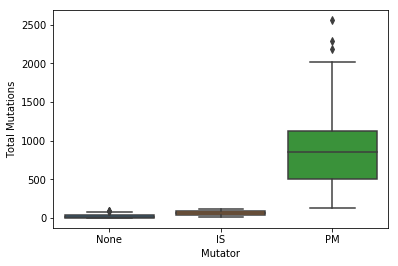

In [171]:
sns.boxplot(data=ltee, x='Mutator', y='Total Mutations')

In [172]:
ltee.groupby('Mutator')['Total Mutations'].mean()

Mutator
IS       66.625000
None     21.449198
PM      921.262295
Name: Total Mutations, dtype: float64

#### Exercise

Merge the cell size data on to the `ltee` table with `pd.merge()`, using the Generation and Population variables. This is only possible if it's been converted to tidy form first, with variable names and values corresponding to those in `1tee`! You will probably want to set `how="left"` (if the cell size data is on the right), since the `ltee` table contains generations that don't exist in the cell size data, and we don't want to throw these rows away.

Do the same with the relative fitness data.

Have a look at missing and repeated values in the newly-added columns. What do you see?

## Writing to a file

To finish off, let's write out our tidied and merged table to a new file, for future analyses. To write to CSV, we can use the `to_csv` method.

In [173]:
# Don't keep the index as we still have the Strain ID column
ltee.to_csv('ltee_solution.csv', index=False)